In [163]:
pip install pandas matplotlib seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [311]:
import os, json
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

path_to_json = '/Users/glopezleal/tmp/contratacion-estado-json/dump/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

df = pd.DataFrame(columns=['id', 'updated', 'money', 'moneyOverall', 'status', 'ts'])

for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        id = json_text['cac-place-ext:ContractFolderStatus']['cbc:ContractFolderID']
        summary = json_text['summary']['#text']
        
        push = False
        if "Junta de Gobierno del Ayuntamiento de Aranda de Duero" in summary:
            push = True
        elif "Alcaldía del Ayuntamiento de Aranda de Duero" in summary:
            push = True
        elif "Pleno del Ayuntamiento de Aranda de Duero" in summary:
            push = True
            
        if not push:
            continue;
        
        money = json_text['cac-place-ext:ContractFolderStatus']['cac:ProcurementProject']['cac:BudgetAmount']['cbc:TotalAmount']['#text']
        try:
            moneyOverall = json_text['cac-place-ext:ContractFolderStatus']['cac:ProcurementProject']['cac:BudgetAmount']['cbc:EstimatedOverallContractAmount']['#text']
        except:
            print(id, js)
            
        updated = pd.to_datetime(datetime.fromisoformat(json_text['updated']), utc=True)
        status = summary[len(summary) - 3:len(summary)]
        ts = updated.strftime('%Y') + updated.strftime('%m')

        df.loc[id] = [id, updated, money, moneyOverall, status, ts]

print(df.shape)


105/15 929396-1436869613570.json
1277/11 729584-1344853062475.json
1158/11 727143-1344856636943.json
1277/11 729584-1328704132920.json
1158/11 727143-1326800229160.json
(455, 6)


In [343]:
df = df.sort_values(by=["updated"], ascending=False)

df_res = df[df.status.eq("RES")].groupby(by=[df.updated.dt.year, df.updated.dt.month])
df_adj = df[df.status.eq("ADJ")].groupby(by=[df.updated.dt.year, df.updated.dt.month])
df_pub = df[df.status.eq("PUB")].groupby(by=[df.updated.dt.year, df.updated.dt.month])
#df_adj = df_adj.drop_duplicates(subset=["id"])

df_all = df.drop_duplicates(subset=["id"]).groupby(by=[df.updated.dt.year, df.updated.dt.month])
df_all_year = df.drop_duplicates(subset=["id"]).groupby(by=[df.updated.dt.year])

id              updated    money moneyOverall  status  \
updated updated                                                              
2012    1        object  datetime64[ns, UTC]  float64      float64  object   
        2        object  datetime64[ns, UTC]  float64      float64  object   
        5        object  datetime64[ns, UTC]  float64      float64  object   
        8        object  datetime64[ns, UTC]  float64      float64  object   
        9        object  datetime64[ns, UTC]  float64      float64  object   
        10       object  datetime64[ns, UTC]  float64      float64  object   
        11       object  datetime64[ns, UTC]  float64      float64  object   
2013    1        object  datetime64[ns, UTC]  float64      float64  object   
        2        object  datetime64[ns, UTC]  float64      float64  object   
        3        object  datetime64[ns, UTC]  float64      float64  object   
        4        object  datetime64[ns, UTC]  float64      float64  object   
        5        object  datetime64[ns, UTC]  float64      float64  object   
        6        object  datetime64[ns, UTC]  float64      float64  object   
        7        object  datetime64[ns, UTC]  float64      float64  object   
        8        object  datetime64[ns, UTC]  float64      float64  object   
        9        object  datetime64[ns, UTC]  float64      float64  object   
        10       object  datetime64[ns, UTC]  float64      float64  object   
        11       object  datetime64[ns, UTC]  float64      float64  object   
        12       object  datetime64[ns, UTC]  float64      float64  object   
2014    1        object  datetime64[ns, UTC]  float64      float64  object   
        2        object  datetime64[ns, UTC]  float64      float64  object   
        3        object  datetime64[ns, UTC]  float64      float64  object   
        4        object  datetime64[ns, UTC]  float64      float64  object   
        5        object  datetime64[ns, UTC]  float64      float64  object   
        6        object  datetime64[ns, UTC]  float64      float64  object   
        7        object  datetime64[ns, UTC]  float64      float64  object   
        8        object  datetime64[ns, UTC]  float64      float64  object   
        9        object  datetime64[ns, UTC]  float64      float64  object   
        10       object  datetime64[ns, UTC]  float64      float64  object   
        11       object  datetime64[ns, UTC]  float64      float64  object   
2015    1        object  datetime64[ns, UTC]  float64      float64  object   
        2        object  datetime64[ns, UTC]  float64      float64  object   
        3        object  datetime64[ns, UTC]  float64      float64  object   
        4        object  datetime64[ns, UTC]  float64      float64  object   
        5        object  datetime64[ns, UTC]  float64      float64  object   
        6        object  datetime64[ns, UTC]  float64      float64  object   
        7        object  datetime64[ns, UTC]  float64      float64  object   
        8        object  datetime64[ns, UTC]  float64      float64  object   
        9        object  datetime64[ns, UTC]  float64      float64  object   
        10       object  datetime64[ns, UTC]  float64      float64  object   
        12       object  datetime64[ns, UTC]  float64      float64  object   
2016    1        object  datetime64[ns, UTC]  float64      float64  object   
        3        object  datetime64[ns, UTC]  float64      float64  object   
        4        object  datetime64[ns, UTC]  float64      float64  object   
        5        object  datetime64[ns, UTC]  float64      float64  object   
        6        object  datetime64[ns, UTC]  float64      float64  object   
        7        object  datetime64[ns, UTC]  float64      float64  object   
        8        object  datetime64[ns, UTC]  float64      float64  object   
        9        object  datetime64[ns, UTC]  float64      float64  object   
        10       object  datetime64[ns, UTC

In [308]:
df_all.head(10000)

,id,updated,money,moneyOverall,status,ts
ABR/SUMIN/2022000040,ABR/SUMIN/2022000040,2022-11-24 20:50:49.770000+00:00,69817.00,57700.00,PUB,202211
ABR/SUMIN/2022000042,ABR/SUMIN/2022000042,2022-11-24 17:32:14.908000+00:00,25047.00,20700.00,PUB,202211
ABR/SERV/2022000039,ABR/SERV/2022000039,2022-11-24 16:30:57.518000+00:00,63645.00,52599.17,PUB,202211
2022/00002645x,2022/00002645x,2022-11-23 12:55:52.313000+00:00,119960.73,99141.10,RES,202211
ABR/SERV/2022000029,ABR/SERV/2022000029,2022-11-22 13:20:57.792000+00:00,59840.55,197820.00,PUB,202211
ABR/SUMIN/2022000038,ABR/SUMIN/2022000038,2022-11-22 13:09:38.836000+00:00,125277.53,103535.15,PUB,202211
ABR/SUMIN/2022000037,ABR/SUMIN/2022000037,2022-11-22 11:58:29.115000+00:00,40000.00,33057.85,PUB,202211
ABR/SUMIN/2022000036,ABR/SUMIN/2022000036,2022-11-17 11:40:40.286000+00:00,30486.10,25195.12,PUB,202211
ABR/OBR/2022000022,ABR/OBR/2022000022,2022-11-17 09:37:16.987000+00:00,2948195.70,2436525.37,PUB,202211
ABR/OBR/2022000035,ABR/OBR/2022000035,2022-11-16 19:06:46.676000+00:00,339796.85,280823.84,PUB,202211


<AxesSubplot: title={'center': 'Suma de € por año/mes'}, xlabel='año/mes', ylabel='€'>

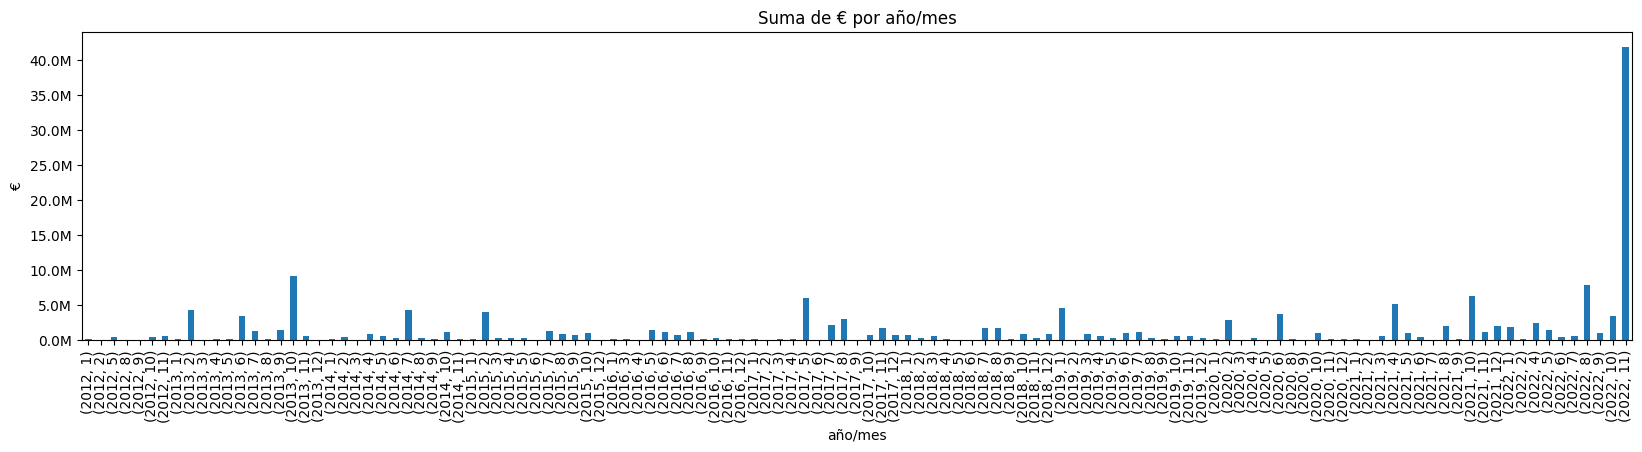

In [323]:
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

df_all['moneyOverall'].sum().plot(
    kind="bar",
    title="Suma de € por año/mes",
    ylabel="€",
    xlabel="año/mes",
    figsize=(20,4)
)


<AxesSubplot: title={'center': 'Suma de € licitados por año/mes'}, xlabel='año/mes', ylabel='€'>

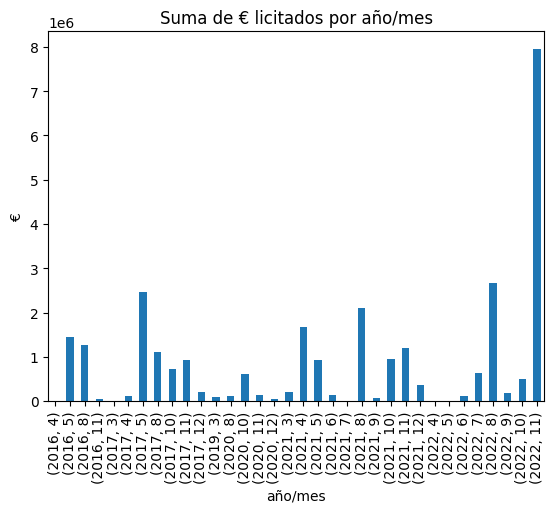

In [223]:
df_pub['money'].sum().plot(
    kind="bar",
    title="Suma de € licitados por año/mes",
    ylabel="€",
    xlabel="año/mes"
)

<AxesSubplot: title={'center': 'Suma de € resueltos por año/mes'}, xlabel='año/mes', ylabel='€'>

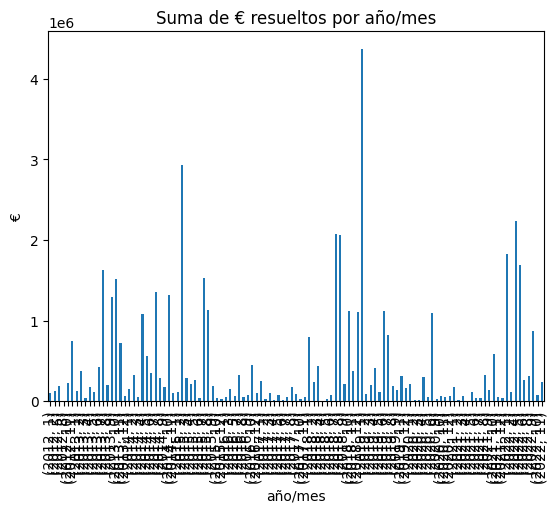

In [300]:
df_res['money'].sum().plot(
    kind="bar",
    title="Suma de € resueltos por año/mes",
    ylabel="€",
    xlabel="año/mes"
)

<AxesSubplot: title={'center': 'Suma de € adjudicados por año/mes'}, xlabel='año/mes', ylabel='€'>

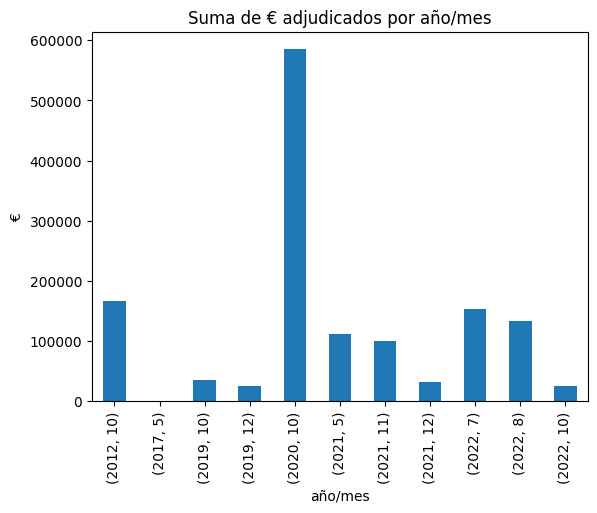

In [301]:

df_adj['money'].sum().plot(
    kind="bar",
    title="Suma de € adjudicados por año/mes",
    ylabel="€",
    xlabel="año/mes"
)

In [335]:
df_adj['moneyOverall']

AttributeError: 'SeriesGroupBy' object has no attribute 'shape'

In [305]:
sns.lineplot(x=df_all.updated.dt.month,y='money',hue=df_all.updated.dt.year, data=df_all) 

AttributeError: 'SeriesGroupBy' object has no attribute 'dt'

In [217]:
dates = df.set_index('updated').resample('M', fill_value=0).asfreq().index
dat

TypeError: DataFrame.resample() got an unexpected keyword argument 'fill_value'

KeyError: 'Columns not found: False, True'

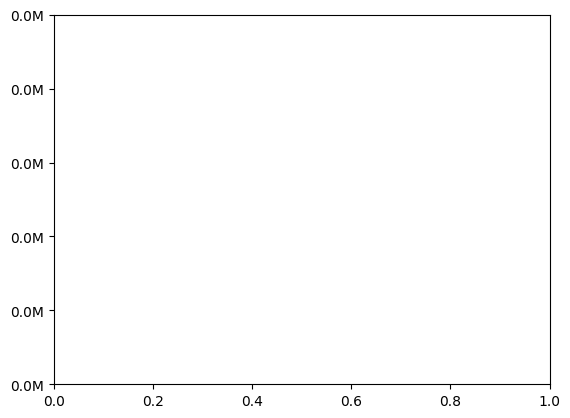

In [329]:
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

df_all[(df.moneyOverall > 1000000.0)].sum().plot(
    kind="bar",
    title="Suma de € por año/mes. Licitaciones > 1M €",
    ylabel="€",
    xlabel="año/mes",
    figsize=(20,4)
)